<a href="https://colab.research.google.com/github/egustavo20/dataset_datascience/blob/master/Limpando_%26_Tratando__Cloud_BD_Gmail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#[Caixa de e-mail] Limpando e transformando dados PYTHON

### O ponto chave para o sucesso de qualquer atividade é a organização e padronização, e quando o assunto são dados não é diferente pois o processo é fundamental para manter a precisão da informação. E trabalhando em uma caixa de e-mail, estaremos realizando uma prévia aplicação, pois a quantidade massiva de e-mail que recebemos no dia-a-dia pode formar um grande e bagunçado banco de dados, principalmente quando a conta é corporativa.###

by [egustavo20](https://www.linkedin.com/in/elcio-gustavo-soares-de-araujo-74a22068/)
_______________________________________________________________________


<center><img width="85%"><img src="https://raw.githubusercontent.com/egustavo20/dataset_datascience/master/LIMPANDO%20E%20TRANSFORMANDO.jpg"></center>



In [ ]:
#Importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mailbox 
import re
import pytz
import numpy as np


###O processo de transformação e limpeza dos dados, não tem o mesmo glamour que a visualização final, desta forma é normal que esse processo passe despercebido, porém essa etapa de transformação e limpeza é o principal responsável pela acurácia dos dados que se tornara informação para tomada de uma decisão. E é nesse momento que um dos outliers, delimitadores ou tipo de codificação que quando não é bem trabalhada pode mudar completamente o resultado impactando diretamente na análise final dos dados  trazendo prejuízos imensuráveis, as vezes apenas por um descuido de uma **","** ou **";"**.###


<center><img width="55%"><img src="https://raw.githubusercontent.com/egustavo20/dataset_datascience/master/CHATO.jpg"></center>






<center>Fonte da imagem: https://bit.ly/3i49Pup </center>

###Quando compreendemos a importância desta etapa, conseguimos assimilar que manipular dados organizados da mais propriedade, velocidade e precisão para as informações, não basta importar o arquivo e sair montando gráficos, quando a análise dos dados deve ser iniciada de sua estrutura.###
###O programa utilizado para a execução dessa tarefa será o python pela sua diversidade de bibliotecas que permite realizar diferentes aplicações de forma simples e precisa. Com o suporte da biblioteca **Mailbox** faremos a extração dos dados direto do **Gmail**.###


In [ ]:
#Extraindo base de dados (Descompactando archive zip.)

!unzip /content/takeout-#########.zip

In [ ]:
#Estrutura primária da base de dados(Formato de extração direto do e-mail) 
mbox = mailbox.mbox('/content/Takeout/E-mail/Todos os e-mails, incluindo Spam e Lixeira.mbox')

In [ ]:
#Chave dos dados(Cabeçalho)
mbox[0].keys()

['X-GM-THRID',
 'X-Gmail-Labels',
 'Delivered-To',
 'Received',
 'X-Google-Smtp-Source',
 'X-Received',
 'ARC-Seal',
 'ARC-Message-Signature',
 'ARC-Authentication-Results',
 'Return-Path',
 'Received',
 'Received-SPF',
 'Authentication-Results',
 'DKIM-Signature',
 'DKIM-Signature',
 'Received',
 'Received',
 'Content-Type',
 'Date',
 'From',
 'Mime-Version',
 'Reply-to',
 'To',
 'Message-ID',
 'Subject',
 'List-Unsubscribe',
 'X-SG-EID',
 'X-SG-ID',
 'X-Entity-ID',
 'X-Feedback-ID']

In [ ]:
#Criando o dicionario para o cabeçalho
email_dict={'date':[],
            'from':[],
            'to':[],
            'subject':[],
            'labels':[]
}

In [ ]:
#Conectando os dados ao cabeçalho e coletando os dados da base
for message in mbox:
  email_dict['date'].append(message['date'])
  email_dict['from'].append(message['From'])
  email_dict['to'].append(message['To'])
  email_dict['subject'].append(message['Subject'])
  email_dict['labels'].append(message['X-Gmail-Labels'])

In [ ]:
#Carregando e montando o Dataframe

df = pd.DataFrame(email_dict)
df

,date,from,to,subject,labels
0,"Wed, 25 Nov 2020 11:30:00 +0000 (UTC)","""Medium Daily Digest"" <noreply@medium.com>",e.gustavosoares20@gmail.com,Python Will be Dead in 2021? | Rizky Maulana N...,"=?UTF-8?Q?Caixa_de_entrada,Categori?=\r\n =?UT..."
1,"Sat, 21 Nov 2020 11:30:00 +0000 (UTC)","""Medium Daily Digest"" <noreply@medium.com>",e.gustavosoares20@gmail.com,A Complete Guide to Exploratory Data Analysis ...,"=?UTF-8?Q?Caixa_de_entrada,Categori?=\r\n =?UT..."
2,"Sat, 07 Nov 2020 11:13:53 -0600","""Grammarly"" <info@send.grammarly.com>",<e.gustavosoares20@gmail.com>,It's been a while...,"=?UTF-8?Q?Caixa_de_entrada,Categoria:_promo=C3..."
3,"Wed, 04 Nov 2020 11:30:00 +0000 (UTC)","""Medium Daily Digest"" <noreply@medium.com>",e.gustavosoares20@gmail.com,Converting nested JSON structures to Pandas Da...,"=?UTF-8?Q?Caixa_de_entrada,Categori?=\r\n =?UT..."
4,"Sun, 6 Dec 2020 16:58:50 +0000",=?UTF-8?B?SW52ZXN0aW5n?= <newsletter@investing...,e.gustavosoares20@gmail.com,"Airbnb's IPO is Finally Happening, But Will it...","=?UTF-8?Q?Caixa_de_entrada,Categoria:_promo=C3..."
...,...,...,...,...,...
975,"Tue, 05 May 2020 10:31:37 -0300 (-03)",=?UTF-8?Q?MarketUP?= <marketup@marketup.com>,<e.gustavosoares20@gmail.com>,=?UTF-8?Q?Live=3A_Como_se_preparar_para_o_futu...,"=?UTF-8?Q?Caixa_de_entrada,Categoria:_promo=C3..."
976,"Wed, 12 Oct 2016 06:28:39 +0000",YouTube <noreply@youtube.com>,e.gustavosoares20@gmail.com,=?UTF-8?Q?PSG_=2D_Paris_Saint=2DGermain=3A_=22...,"=?UTF-8?Q?Caixa_de_entrada,Categoria:_redes_so..."
977,"Tue, 26 Apr 2016 18:21:43 +0000",Apple <News_Americas@InsideApple.Apple.com>,e.gustavosoares20@gmail.com,=?UTF-8?Q?O_presente_ideal_para_comemorar_o_Di...,"=?UTF-8?Q?Caixa_de_entrada,Categoria:_promo=C3..."
978,"Mon, 19 Aug 2019 13:31:09 -0700",e.gustavosoares20@gmail.com,e.gustavosoares20@gmail.com,"Rotas de Capuava para Av. Adolfo Pinheiro, 205...","=?UTF-8?Q?Enviado,Caixa_de_entrada,Categoria:_..."


In [ ]:
#Identificando os tipos de variaveis
df.dtypes

date       object
from       object
to         object
subject    object
labels     object
dtype: object

##Tratamento & Limpeza

In [ ]:
#Trantando strings fora do padrão datetime ZULU - UTC (Papa)
df['date']= df['date'].str.replace("UTC00","+0000").str.replace("UTC","+0000").str[0:31]

In [ ]:
#Converção de datetime ZULU - UTC (Papa)
df['date'] = pd.to_datetime(df['date'], utc=True)
df['date'] = df['date'].apply(lambda x: x.astimezone(pytz.timezone('America/Sao_Paulo')))
df


,date,from,to,subject,labels
0,2020-11-25 09:30:00-02:00,"""Medium Daily Digest"" <noreply@medium.com>",e.gustavosoares20@gmail.com,Python Will be Dead in 2021? | Rizky Maulana N...,"=?UTF-8?Q?Caixa_de_entrada,Categori?=\r\n =?UT..."
1,2020-11-21 09:30:00-02:00,"""Medium Daily Digest"" <noreply@medium.com>",e.gustavosoares20@gmail.com,A Complete Guide to Exploratory Data Analysis ...,"=?UTF-8?Q?Caixa_de_entrada,Categori?=\r\n =?UT..."
2,2020-11-07 15:13:53-02:00,"""Grammarly"" <info@send.grammarly.com>",<e.gustavosoares20@gmail.com>,It's been a while...,"=?UTF-8?Q?Caixa_de_entrada,Categoria:_promo=C3..."
3,2020-11-04 09:30:00-02:00,"""Medium Daily Digest"" <noreply@medium.com>",e.gustavosoares20@gmail.com,Converting nested JSON structures to Pandas Da...,"=?UTF-8?Q?Caixa_de_entrada,Categori?=\r\n =?UT..."
4,2020-12-06 14:58:50-02:00,=?UTF-8?B?SW52ZXN0aW5n?= <newsletter@investing...,e.gustavosoares20@gmail.com,"Airbnb's IPO is Finally Happening, But Will it...","=?UTF-8?Q?Caixa_de_entrada,Categoria:_promo=C3..."
...,...,...,...,...,...
975,2020-05-05 10:31:37-03:00,=?UTF-8?Q?MarketUP?= <marketup@marketup.com>,<e.gustavosoares20@gmail.com>,=?UTF-8?Q?Live=3A_Como_se_preparar_para_o_futu...,"=?UTF-8?Q?Caixa_de_entrada,Categoria:_promo=C3..."
976,2016-10-12 03:28:39-03:00,YouTube <noreply@youtube.com>,e.gustavosoares20@gmail.com,=?UTF-8?Q?PSG_=2D_Paris_Saint=2DGermain=3A_=22...,"=?UTF-8?Q?Caixa_de_entrada,Categoria:_redes_so..."
977,2016-04-26 15:21:43-03:00,Apple <News_Americas@InsideApple.Apple.com>,e.gustavosoares20@gmail.com,=?UTF-8?Q?O_presente_ideal_para_comemorar_o_Di...,"=?UTF-8?Q?Caixa_de_entrada,Categoria:_promo=C3..."
978,2019-08-19 17:31:09-03:00,e.gustavosoares20@gmail.com,e.gustavosoares20@gmail.com,"Rotas de Capuava para Av. Adolfo Pinheiro, 205...","=?UTF-8?Q?Enviado,Caixa_de_entrada,Categoria:_..."


In [ ]:
#Identificando valores nulos
df.isnull().sum()

date       0
from       0
to         1
subject    0
labels     0
dtype: int64

In [ ]:
#Limpando valores nulos
df.dropna(how = 'any',inplace=True)

In [ ]:
#Identificando valores nulos
df.isnull().sum()

date       0
from       0
to         0
subject    0
labels     0
dtype: int64

In [ ]:
#Criando função para limpeza da coluna e-mail
def extrair_email(string_email):
  email = re.findall(r'<(.+?)>',string_email)
  if email:
    return email[0]
  else:
      return string_email


In [ ]:
#Aplicando a função
df['to'] = df['to'].apply(extrair_email)
df['from'] = df['from'].apply(extrair_email)

In [ ]:
df.tail()

,date,from,to,subject,labels
975,2020-05-05 10:31:37-03:00,marketup@marketup.com,e.gustavosoares20@gmail.com,=?UTF-8?Q?Live=3A_Como_se_preparar_para_o_futu...,"=?UTF-8?Q?Caixa_de_entrada,Categoria:_promo=C3..."
976,2016-10-12 03:28:39-03:00,noreply@youtube.com,e.gustavosoares20@gmail.com,=?UTF-8?Q?PSG_=2D_Paris_Saint=2DGermain=3A_=22...,"=?UTF-8?Q?Caixa_de_entrada,Categoria:_redes_so..."
977,2016-04-26 15:21:43-03:00,News_Americas@InsideApple.Apple.com,e.gustavosoares20@gmail.com,=?UTF-8?Q?O_presente_ideal_para_comemorar_o_Di...,"=?UTF-8?Q?Caixa_de_entrada,Categoria:_promo=C3..."
978,2019-08-19 17:31:09-03:00,e.gustavosoares20@gmail.com,e.gustavosoares20@gmail.com,"Rotas de Capuava para Av. Adolfo Pinheiro, 205...","=?UTF-8?Q?Enviado,Caixa_de_entrada,Categoria:_..."
979,2020-10-26 09:23:37-03:00,Dell_Home@br.home.dell.com,e.gustavosoares20@gmail.com,=?utf-8?B?Q2xpZW50ZSBEZWxsLCBzYWJlIGEgQmxhY2sg...,"=?UTF-8?Q?Caixa_de_entrada,Categoria:_promo=C3..."


In [ ]:
#Função para reemoção de labels

def remove_label(string_label):
  return string_label.replace("=?UTF-8?Q?","").split(",")[0]

In [ ]:
#Limpando a coluna labels
df['labels']=df['labels'].apply(remove_label)

In [ ]:
df.tail()

,date,from,to,subject,labels
975,2020-05-05 10:31:37-03:00,marketup@marketup.com,e.gustavosoares20@gmail.com,=?UTF-8?Q?Live=3A_Como_se_preparar_para_o_futu...,Caixa_de_entrada
976,2016-10-12 03:28:39-03:00,noreply@youtube.com,e.gustavosoares20@gmail.com,=?UTF-8?Q?PSG_=2D_Paris_Saint=2DGermain=3A_=22...,Caixa_de_entrada
977,2016-04-26 15:21:43-03:00,News_Americas@InsideApple.Apple.com,e.gustavosoares20@gmail.com,=?UTF-8?Q?O_presente_ideal_para_comemorar_o_Di...,Caixa_de_entrada
978,2019-08-19 17:31:09-03:00,e.gustavosoares20@gmail.com,e.gustavosoares20@gmail.com,"Rotas de Capuava para Av. Adolfo Pinheiro, 205...",Enviado
979,2020-10-26 09:23:37-03:00,Dell_Home@br.home.dell.com,e.gustavosoares20@gmail.com,=?utf-8?B?Q2xpZW50ZSBEZWxsLCBzYWJlIGEgQmxhY2sg...,Caixa_de_entrada


##EDA - (Exploratory Data Analysis/ Análise Exploratória de Dados)

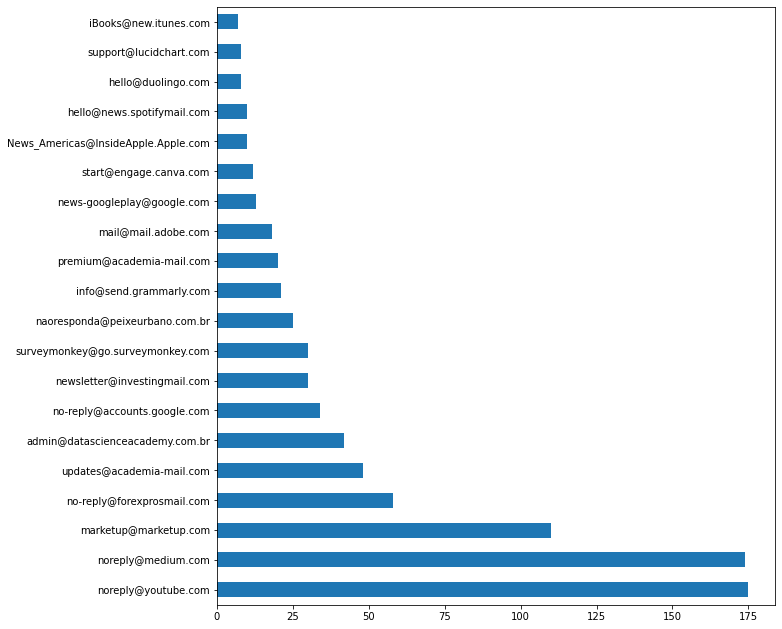

In [ ]:
#Analise exploratoria dos dados
fig,ax= plt.subplots(figsize=(10,11))
df[df['labels']=="Caixa_de_entrada"]['from'].value_counts()[0:20].plot.barh(ax=ax);

In [ ]:
#Criando features para novas analises (semana)
df['Semana']=df['date'].dt.weekday

In [ ]:
#Aplicando o dicionario para semana
seman = {0:"Segunda-feira",1:"Terça-feira",2:"Quarta-feira",3:"Quinta-feira",4:"Sexta-feira",5:"Sabado",6:"Domingo"}
df['Semana']=df['Semana'].replace(seman)

In [ ]:
df.tail()

,date,from,to,subject,labels,Semana
975,2020-05-05 10:31:37-03:00,marketup@marketup.com,e.gustavosoares20@gmail.com,=?UTF-8?Q?Live=3A_Como_se_preparar_para_o_futu...,Caixa_de_entrada,Terça-feira
976,2016-10-12 03:28:39-03:00,noreply@youtube.com,e.gustavosoares20@gmail.com,=?UTF-8?Q?PSG_=2D_Paris_Saint=2DGermain=3A_=22...,Caixa_de_entrada,Quarta-feira
977,2016-04-26 15:21:43-03:00,News_Americas@InsideApple.Apple.com,e.gustavosoares20@gmail.com,=?UTF-8?Q?O_presente_ideal_para_comemorar_o_Di...,Caixa_de_entrada,Terça-feira
978,2019-08-19 17:31:09-03:00,e.gustavosoares20@gmail.com,e.gustavosoares20@gmail.com,"Rotas de Capuava para Av. Adolfo Pinheiro, 205...",Enviado,Segunda-feira
979,2020-10-26 09:23:37-03:00,Dell_Home@br.home.dell.com,e.gustavosoares20@gmail.com,=?utf-8?B?Q2xpZW50ZSBEZWxsLCBzYWJlIGEgQmxhY2sg...,Caixa_de_entrada,Segunda-feira


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


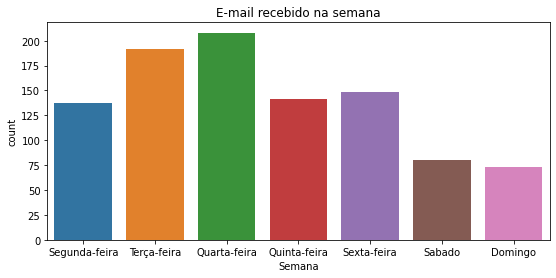

In [ ]:
#Plotando gráfico de semana
fig, ax= plt.subplots(figsize=(9,4))
sns.countplot(df['Semana'],order=["Segunda-feira","Terça-feira","Quarta-feira","Quinta-feira","Sexta-feira","Sabado","Domingo"])
plt.title("E-mail recebido na semana")
plt.show()

In [ ]:
#Criando features para novas analises (hora)
df['Hora'] = df['date'].dt.hour
df['Ano'] = df['date'].dt.year
df.tail()

,date,from,to,subject,labels,Semana,Hora,Ano
975,2020-05-05 10:31:37-03:00,marketup@marketup.com,e.gustavosoares20@gmail.com,=?UTF-8?Q?Live=3A_Como_se_preparar_para_o_futu...,Caixa_de_entrada,Terça-feira,10,2020
976,2016-10-12 03:28:39-03:00,noreply@youtube.com,e.gustavosoares20@gmail.com,=?UTF-8?Q?PSG_=2D_Paris_Saint=2DGermain=3A_=22...,Caixa_de_entrada,Quarta-feira,3,2016
977,2016-04-26 15:21:43-03:00,News_Americas@InsideApple.Apple.com,e.gustavosoares20@gmail.com,=?UTF-8?Q?O_presente_ideal_para_comemorar_o_Di...,Caixa_de_entrada,Terça-feira,15,2016
978,2019-08-19 17:31:09-03:00,e.gustavosoares20@gmail.com,e.gustavosoares20@gmail.com,"Rotas de Capuava para Av. Adolfo Pinheiro, 205...",Enviado,Segunda-feira,17,2019
979,2020-10-26 09:23:37-03:00,Dell_Home@br.home.dell.com,e.gustavosoares20@gmail.com,=?utf-8?B?Q2xpZW50ZSBEZWxsLCBzYWJlIGEgQmxhY2sg...,Caixa_de_entrada,Segunda-feira,9,2020


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


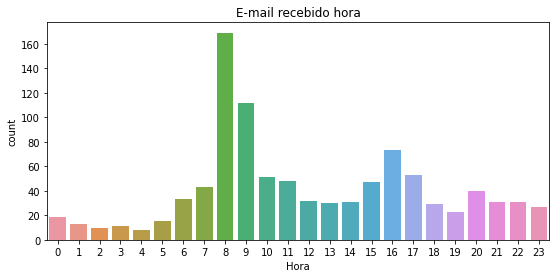

In [ ]:
#Plotando gráfico de hora
fig, ax= plt.subplots(figsize=(9,4))
sns.countplot(df['Hora'])
plt.title("E-mail recebido hora")
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


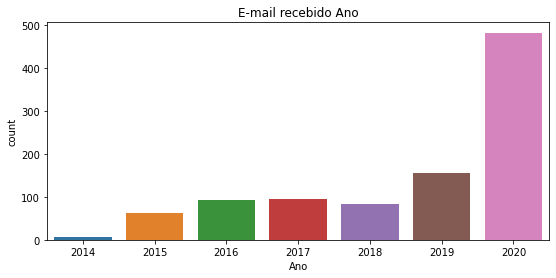

In [ ]:
#Plotando gráfico de hora
fig, ax= plt.subplots(figsize=(9,4))
sns.countplot(df['Ano'])
plt.title("E-mail recebido Ano")
plt.show()

In [ ]:
#Exportando base de dados para excel
df['date'] = df['date'].apply(lambda a: pd.to_datetime(a).date()) 
df.to_excel("My_email.xlsx",index=False)

##Word Cloud

In [ ]:
!pip install wordcloud -q

In [ ]:
import numpy as np
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

In [ ]:
# concatenar as palavras
all_summary = " ".join(s for s in summary)

# ver quantidade de palavras
print("Quantidade de Palavras: {}".format(len(all_summary)))

Quantidade de Palavras: 23571


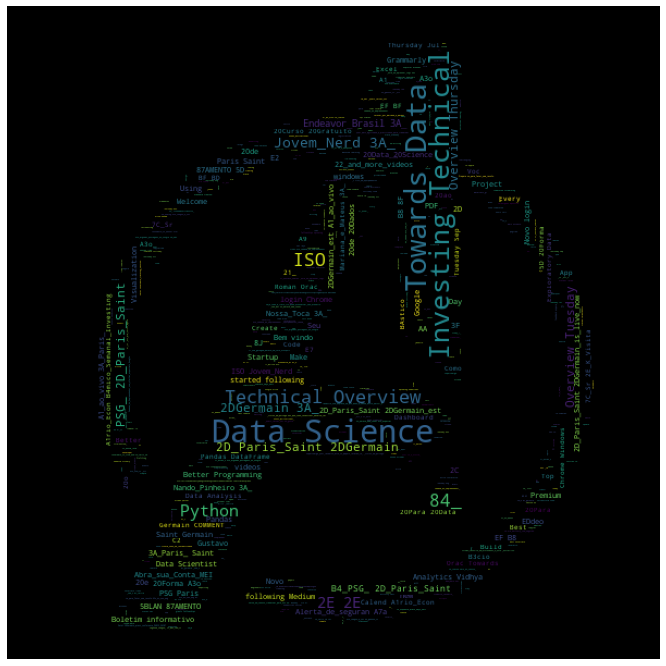

In [ ]:
#Criando e Desenhando uma wordcloud 
summary = df['subject']

all_summary = " ".join(s for s in summary)
 
# lista de stopword
stopwords = set(STOPWORDS)
stopwords.update(["da", "meu", "em", "você", "de", "ao", "os", "ai", "UTF", "_http", "hotmail", "gmail","F0","9F","C3","F0","A7","22_e_mais_v","ADdeos"])

 # endereço LOCAL da SUA imagem
py_mask = np.array(Image.open("/content/13.jpg"))
   
# gerar uma wordcloud
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="Black",
                      width=1000, height=1000, max_words=23800,
                      mask=py_mask, max_font_size=250,
                      min_font_size=1.5).generate(all_summary)
 
# mostrar a imagem final
fig, ax = plt.subplots(figsize=(14,12))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()
plt.imshow(wordcloud)
wordcloud.to_file("python_world_cloud.jpg");